# 1.Import libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB as GB

# 2.Import Dataset

In [3]:
train=pd.read_csv('SalaryData_Train(1).csv')
test=pd.read_csv('SalaryData_Test(1).csv')

# 3.Data Understanding

In [4]:
train.shape,test.shape

((30161, 14), (15060, 14))

In [5]:
train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [7]:
test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
train.dtypes,test.dtypes

(age               int64
 workclass        object
 education        object
 educationno       int64
 maritalstatus    object
 occupation       object
 relationship     object
 race             object
 sex              object
 capitalgain       int64
 capitalloss       int64
 hoursperweek      int64
 native           object
 Salary           object
 dtype: object,
 age               int64
 workclass        object
 education        object
 educationno       int64
 maritalstatus    object
 occupation       object
 relationship     object
 race             object
 sex              object
 capitalgain       int64
 capitalloss       int64
 hoursperweek      int64
 native           object
 Salary           object
 dtype: object)

In [12]:
v=train.Salary.value_counts()

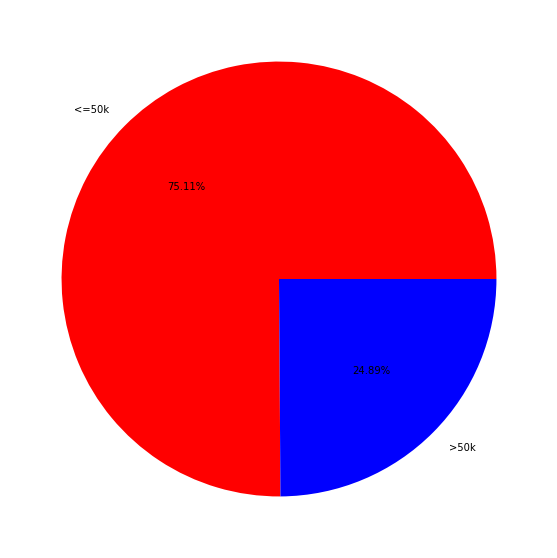

In [15]:
plt.figure(figsize=(10,10))
plt.pie(v,labels=['<=50k','>50k'],colors=['r','b'],autopct='%0.2f%%')
plt.show()

<Figure size 1440x576 with 0 Axes>

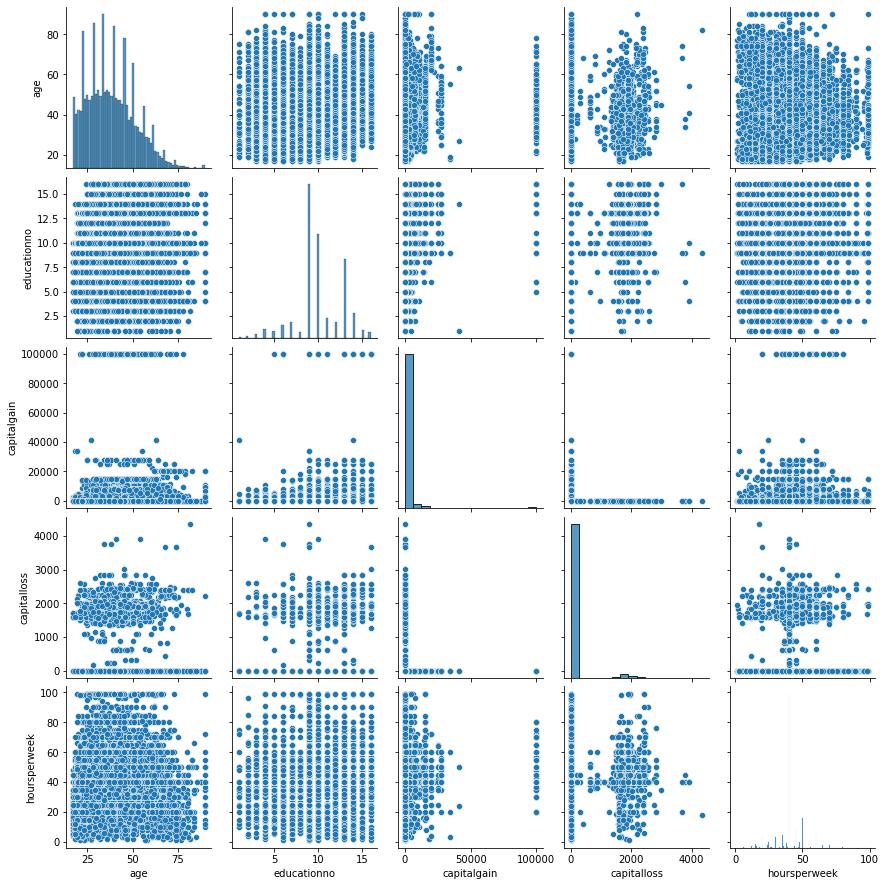

In [17]:
plt.figure(figsize=(20,8))
sns.pairplot(train)
plt.show()

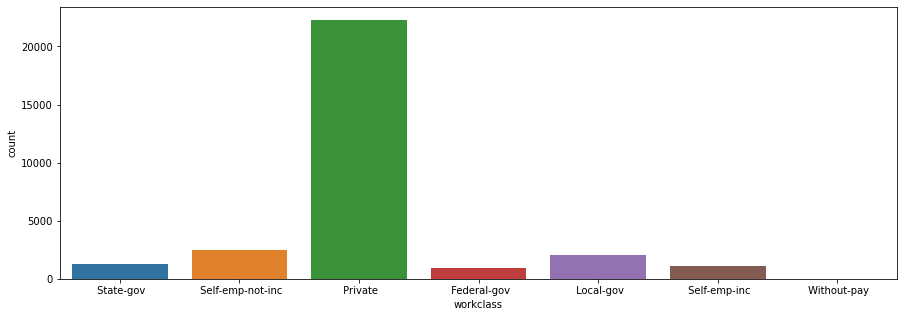

In [21]:
plt.figure(figsize=(15,5))
sns.countplot(train.workclass)
plt.show()

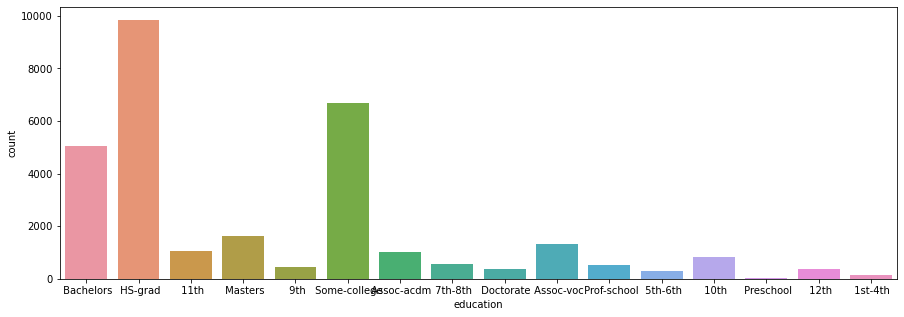

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(train.education )
plt.show()

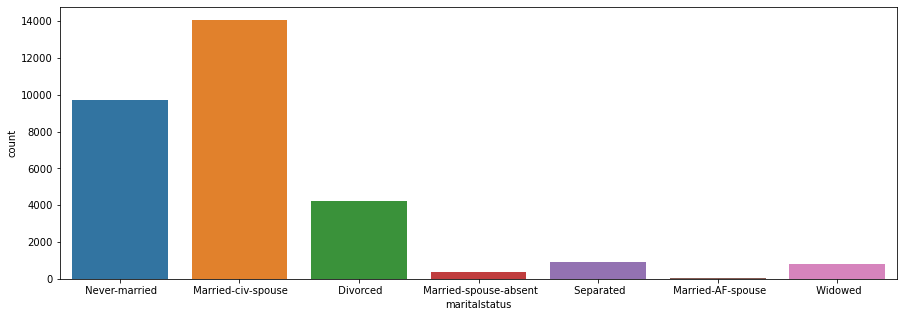

In [23]:
plt.figure(figsize=(15,5))
sns.countplot(train.maritalstatus)
plt.show()

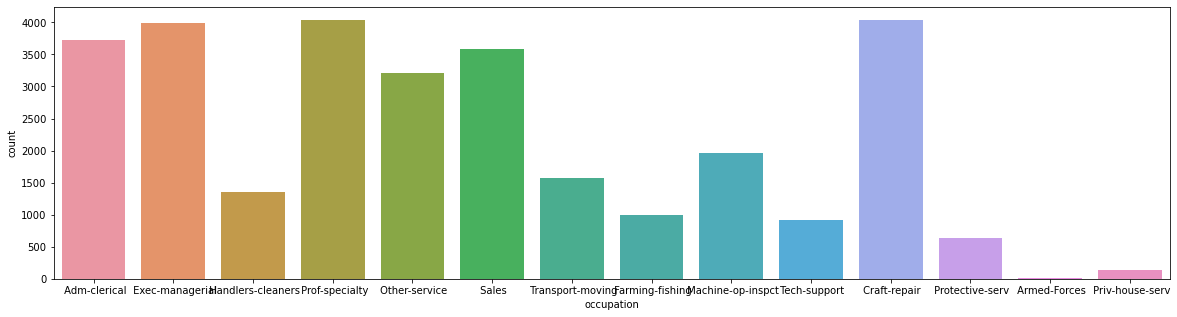

In [25]:
plt.figure(figsize=(20,5))
sns.countplot(train.occupation)
plt.show()

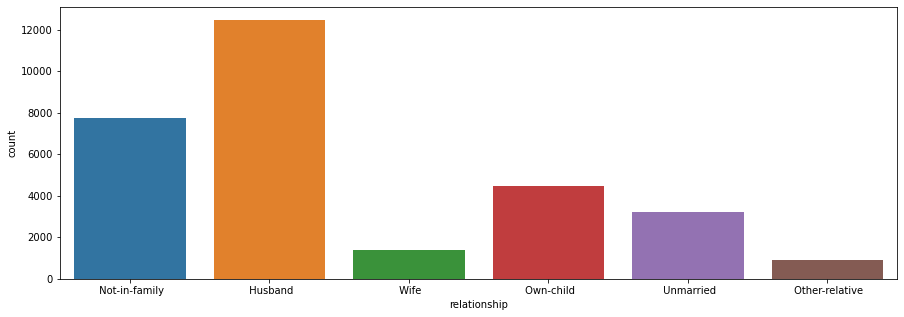

In [26]:
plt.figure(figsize=(15,5))
sns.countplot(train.relationship)
plt.show()

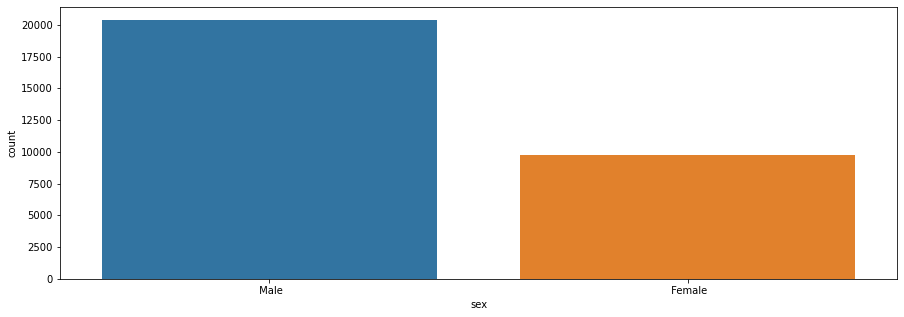

In [27]:
plt.figure(figsize=(15,5))
sns.countplot(train.sex)
plt.show()

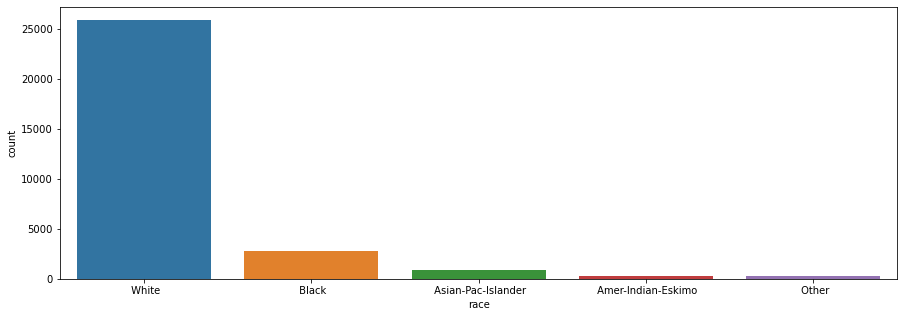

In [28]:
plt.figure(figsize=(15,5))
sns.countplot(train.race)
plt.show()

In [31]:
train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

# 4.Data Preprocessing

In [32]:
le=LabelEncoder()

In [34]:
train['workclass']=le.fit_transform(train['workclass'])
train['education']=le.fit_transform(train['education'])
train['maritalstatus']=le.fit_transform(train['maritalstatus'])
train['occupation']=le.fit_transform(train['occupation'])
train['relationship']=le.fit_transform(train['relationship'])
train['race']=le.fit_transform(train['race'])
train['sex']=le.fit_transform(train['sex'])
train['native']=le.fit_transform(train['native'])
train['Salary']=le.fit_transform(train['Salary'])

In [35]:
train.dtypes

age              int64
workclass        int64
education        int32
educationno      int64
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int32
dtype: object

In [36]:
test['workclass']=le.fit_transform(test['workclass'])
test['education']=le.fit_transform(test['education'])
test['maritalstatus']=le.fit_transform(test['maritalstatus'])
test['occupation']=le.fit_transform(test['occupation'])
test['relationship']=le.fit_transform(test['relationship'])
test['race']=le.fit_transform(test['race'])
test['sex']=le.fit_transform(test['sex'])
test['native']=le.fit_transform(test['native'])
test['Salary']=le.fit_transform(test['Salary'])

In [37]:
test.dtypes

age              int64
workclass        int32
education        int32
educationno      int64
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int32
dtype: object

# 5.Model Building

#### Splitting data

In [57]:
X_train=train.drop('Salary',axis=1)
y_train=train['Salary']
X_test=test.drop('Salary',axis=1)
y_test=test['Salary']

In [58]:
X_train.shape,y_train.shape

((30161, 13), (30161,))

In [59]:
X_test.shape,y_test.shape

((15060, 13), (15060,))

## Multinomial Naive Bayes

In [60]:
mb=MB()

# 6.model Traning

In [61]:
mb.fit(X_train,y_train)

MultinomialNB()

# 7.Model Testing | 8.Model Evaluation

#### Train data

In [62]:
y_pred_train=mb.predict(X_train)

In [65]:
accuracy_mb_train=np.mean(y_pred_train==y_train)

#### Test Data

In [68]:
y_py_pred_train=mb.predict(X_train)red_test=mb.predict(X_test)

In [69]:
accuracy_mb_test=np.mean(y_pred_test==y_test)

In [70]:
accuracy_mb_train,accuracy_mb_test

(0.7729186698053778, 0.7749667994687915)

## Gaussian Naive Bayes

# Model Building

In [71]:
gb=GB()

# Model Training

In [72]:
gb.fit(X_train,y_train)

GaussianNB()

# Model Testing | Model Evaluation

#### Train data

In [73]:
y_pred_train=gb.predict(X_train)

In [75]:
accuracy_gb_train=np.mean(y_pred_train==y_train)

#### Test data

In [76]:
y_pred_test=gb.predict(X_test)

In [77]:
accuracy_gb_test=np.mean(y_pred_test==y_test)

In [78]:
accuracy_gb_train,accuracy_gb_test

(0.7953317197705646, 0.7946879150066402)